In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
import urllib.request

In [19]:
url = "https://www.southernliving.com/thmb/teaKzZUma8RyPpmnj8pK6CxwT2k=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/valentine-bouquet-gettyimages-55949391-2000-d675e30abd0243f1bf1d13ecb212d45b.jpg"
req = urllib.request.urlopen(url)
img_array = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)

In [20]:
kernel = np.array([[1, 1, 1],
                   [1, 2, 1],
                   [1, 1, 1]])
kernel = kernel / np.sum(kernel)  # Normalize the kernel

In [21]:
filtered_img_manual = cv2.filter2D(img, -1, kernel)

In [22]:
filtered_img_cv2 = cv2.filter2D(img, -1, kernel)


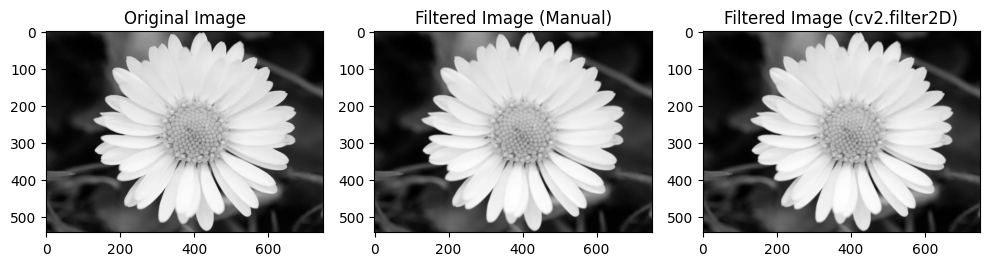

In [25]:
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(filtered_img_manual, cmap='gray')
plt.title('Filtered Image (Manual)')

plt.subplot(133)
plt.imshow(filtered_img_cv2, cmap='gray')
plt.title('Filtered Image (cv2.filter2D)')

plt.tight_layout()
plt.show()